In [27]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/tips (data for regression problem).csv")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.shape

(244, 7)

In [5]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [6]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [7]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [8]:
df['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


In [9]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


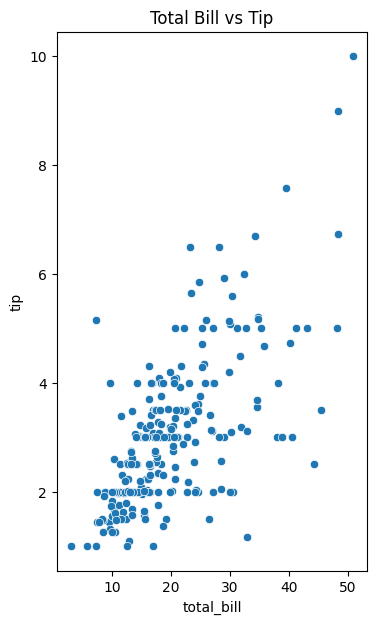

In [12]:
plt.figure(figsize=(4, 7))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Total Bill vs Tip")
plt.show()

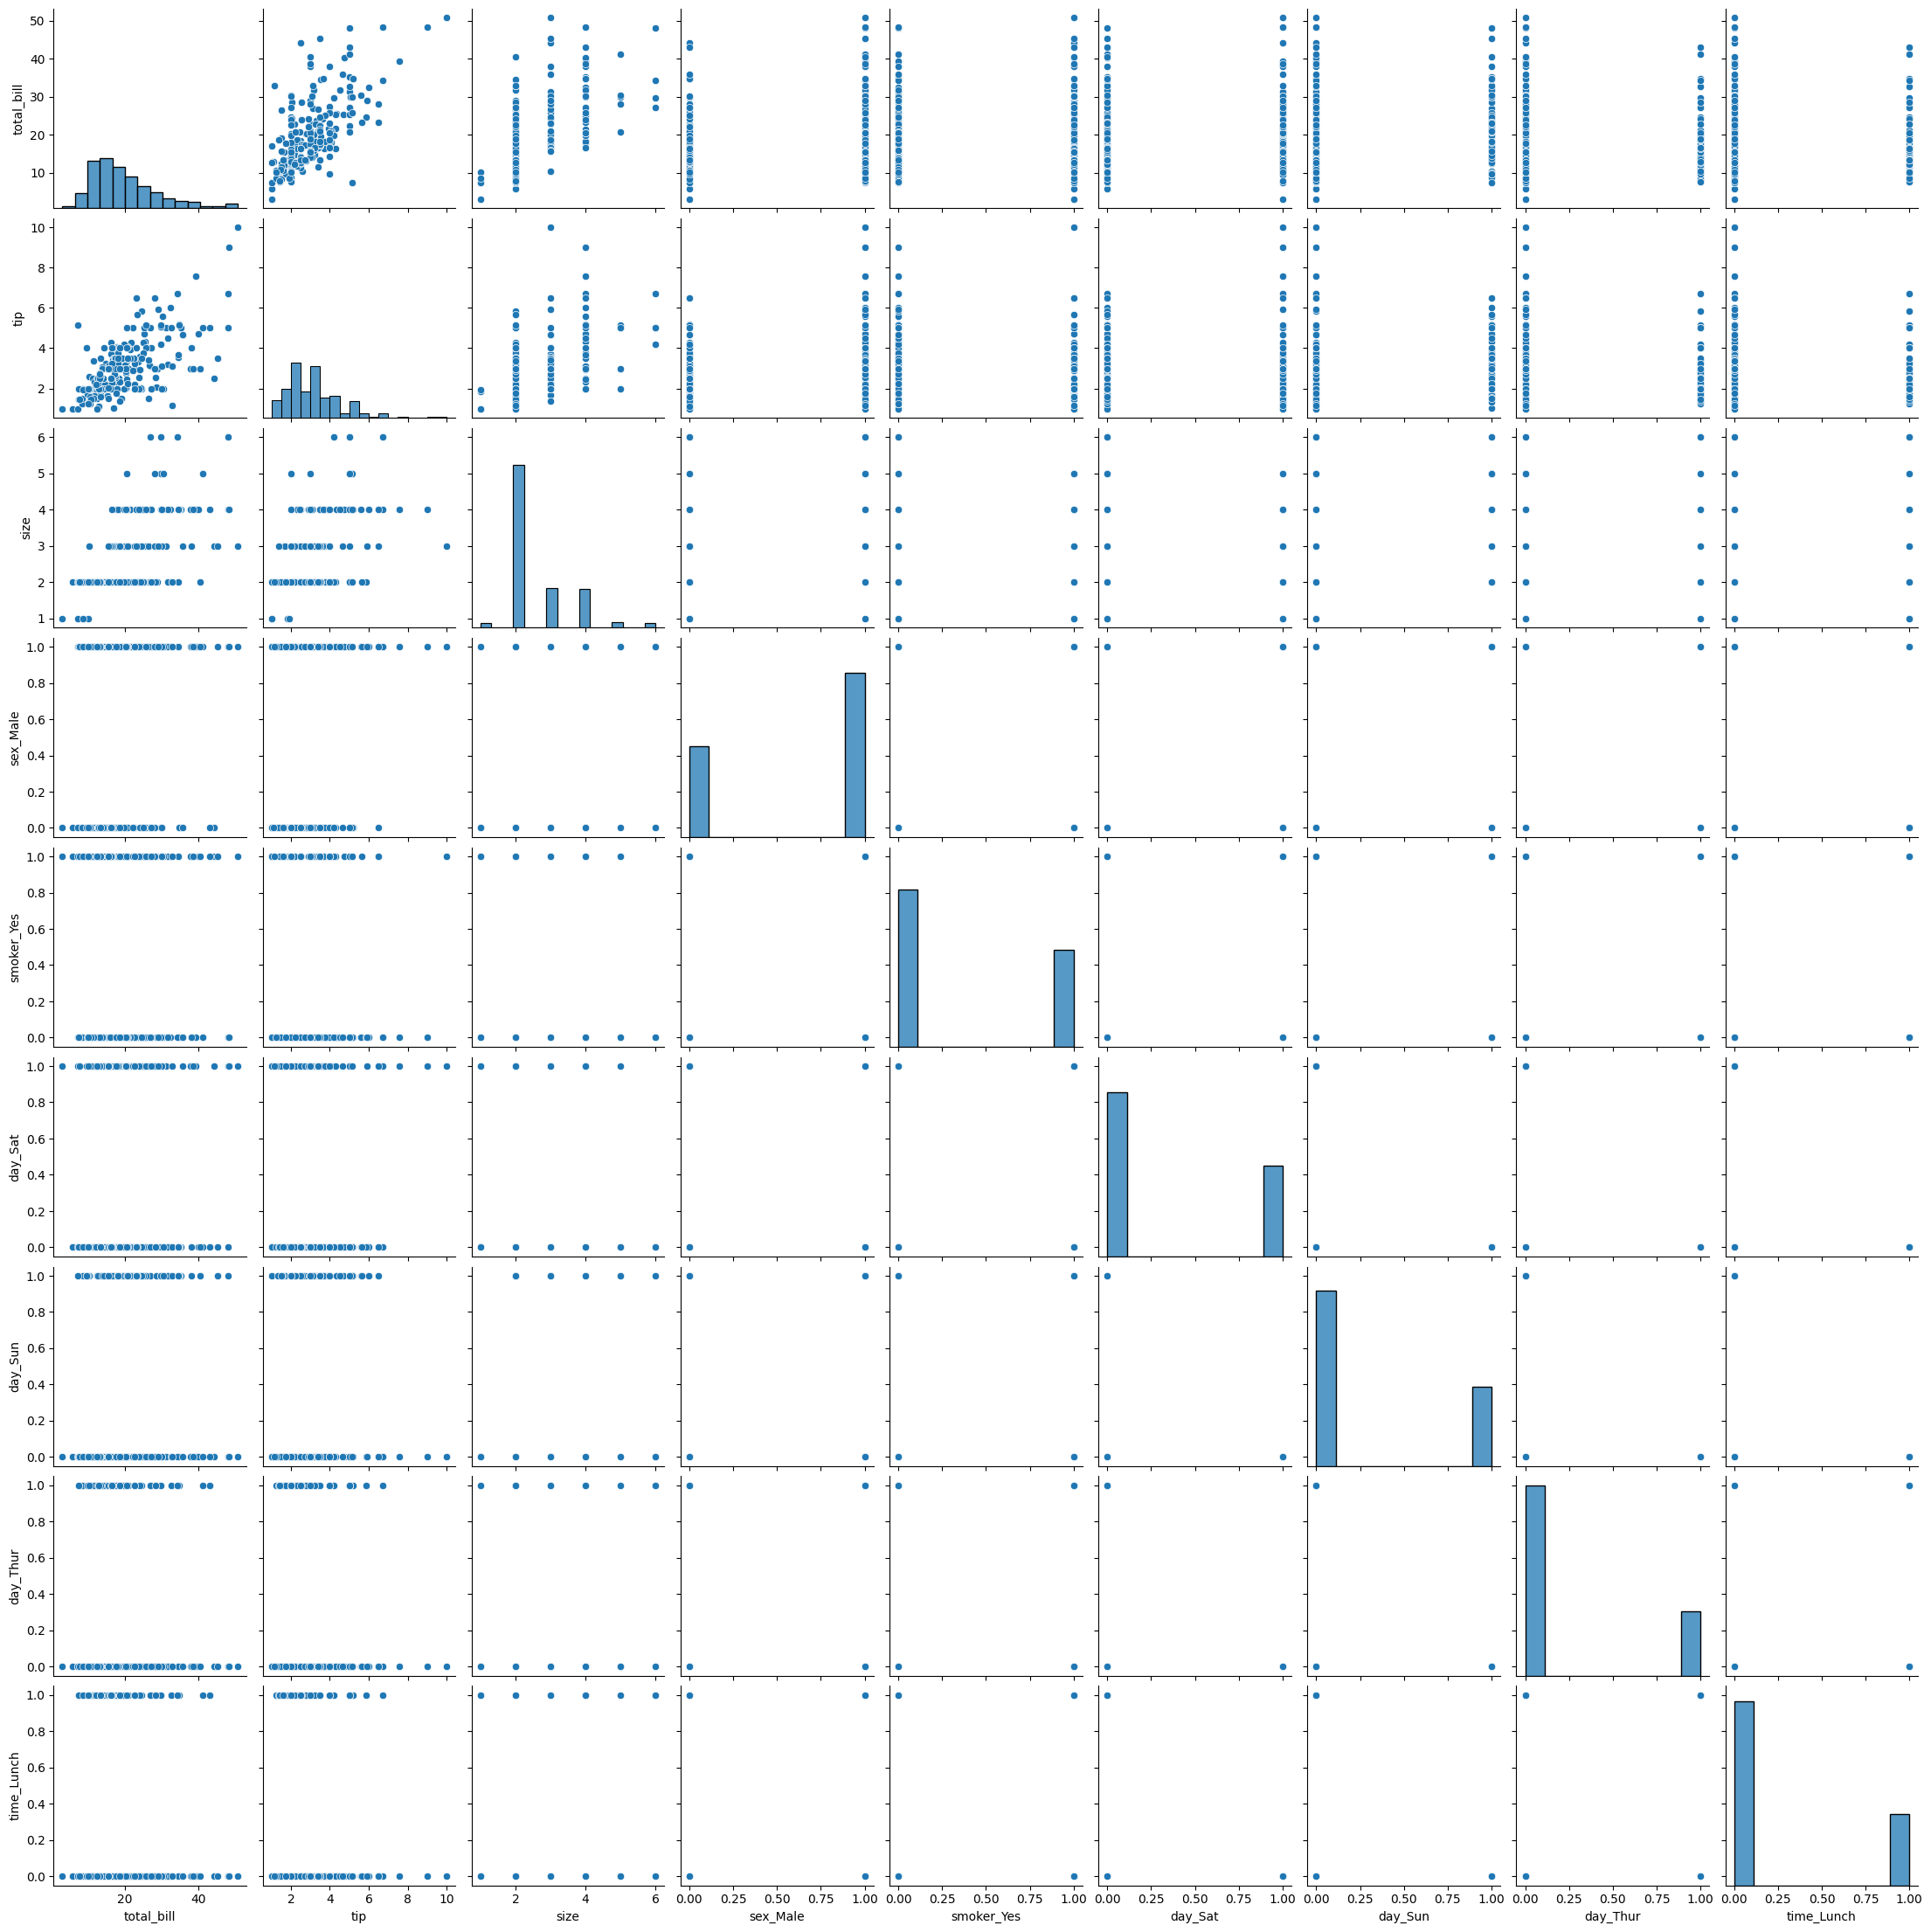

In [13]:
sns.pairplot(df)
plt.show()

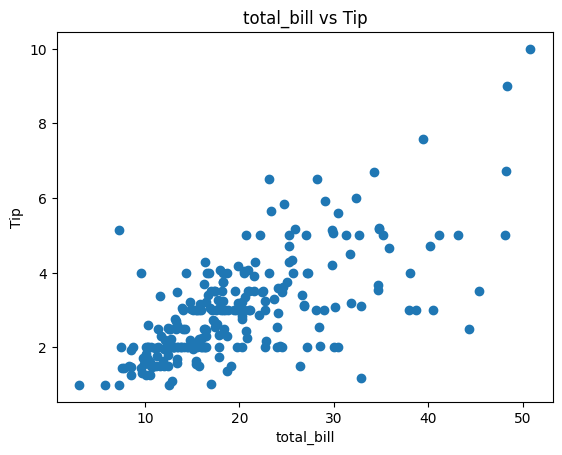

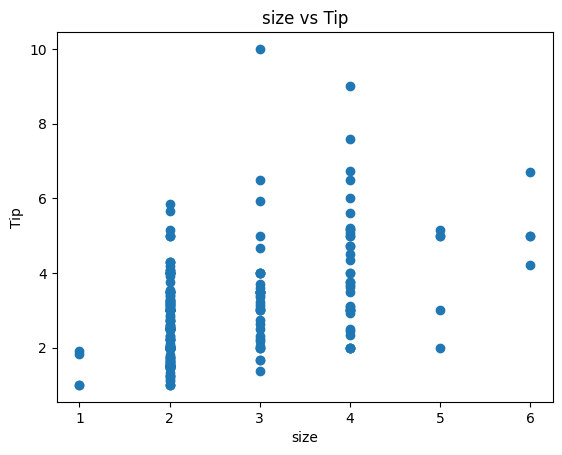

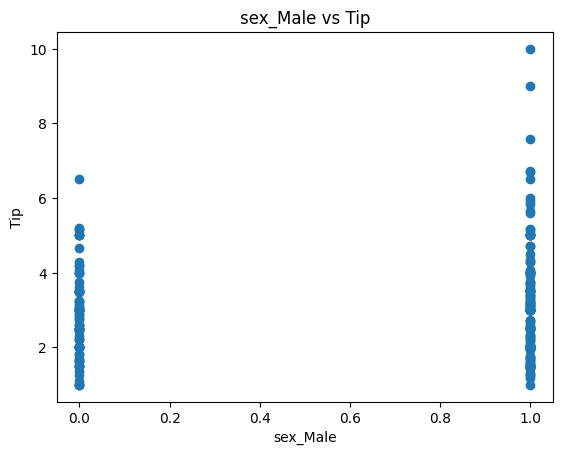

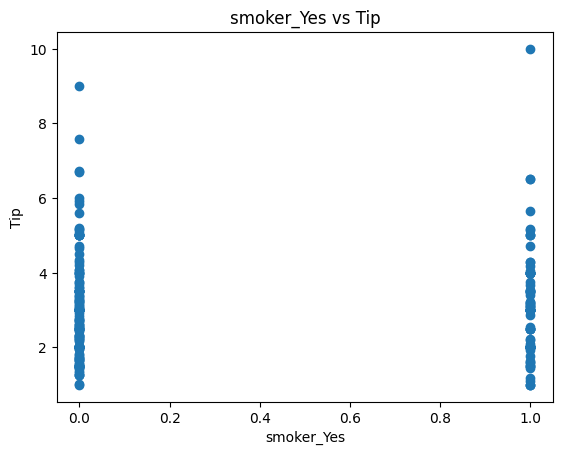

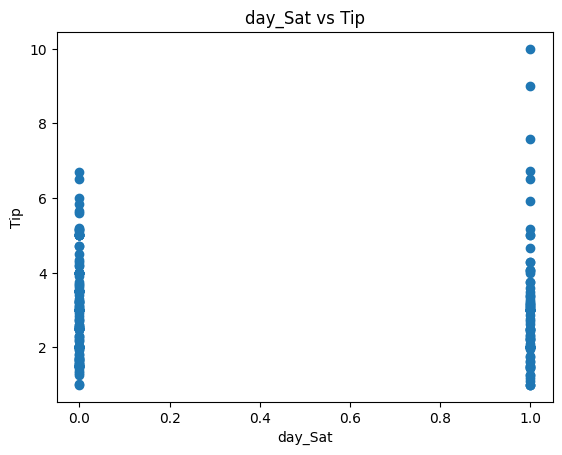

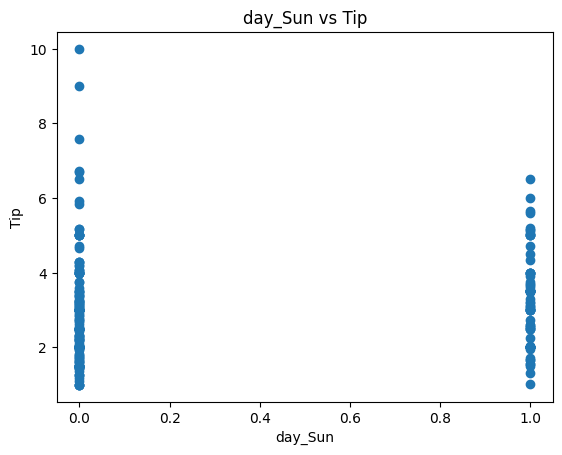

In [14]:
df1 = df.drop(columns=['tip'])
df2 = df['tip']
for i in range(0,6):
    plt.scatter(df1.iloc[:,i], df2)
    plt.xlabel(df1.columns[i])
    plt.ylabel('Tip')
    plt.title(df1.columns[i] + ' vs Tip')
    plt.show()

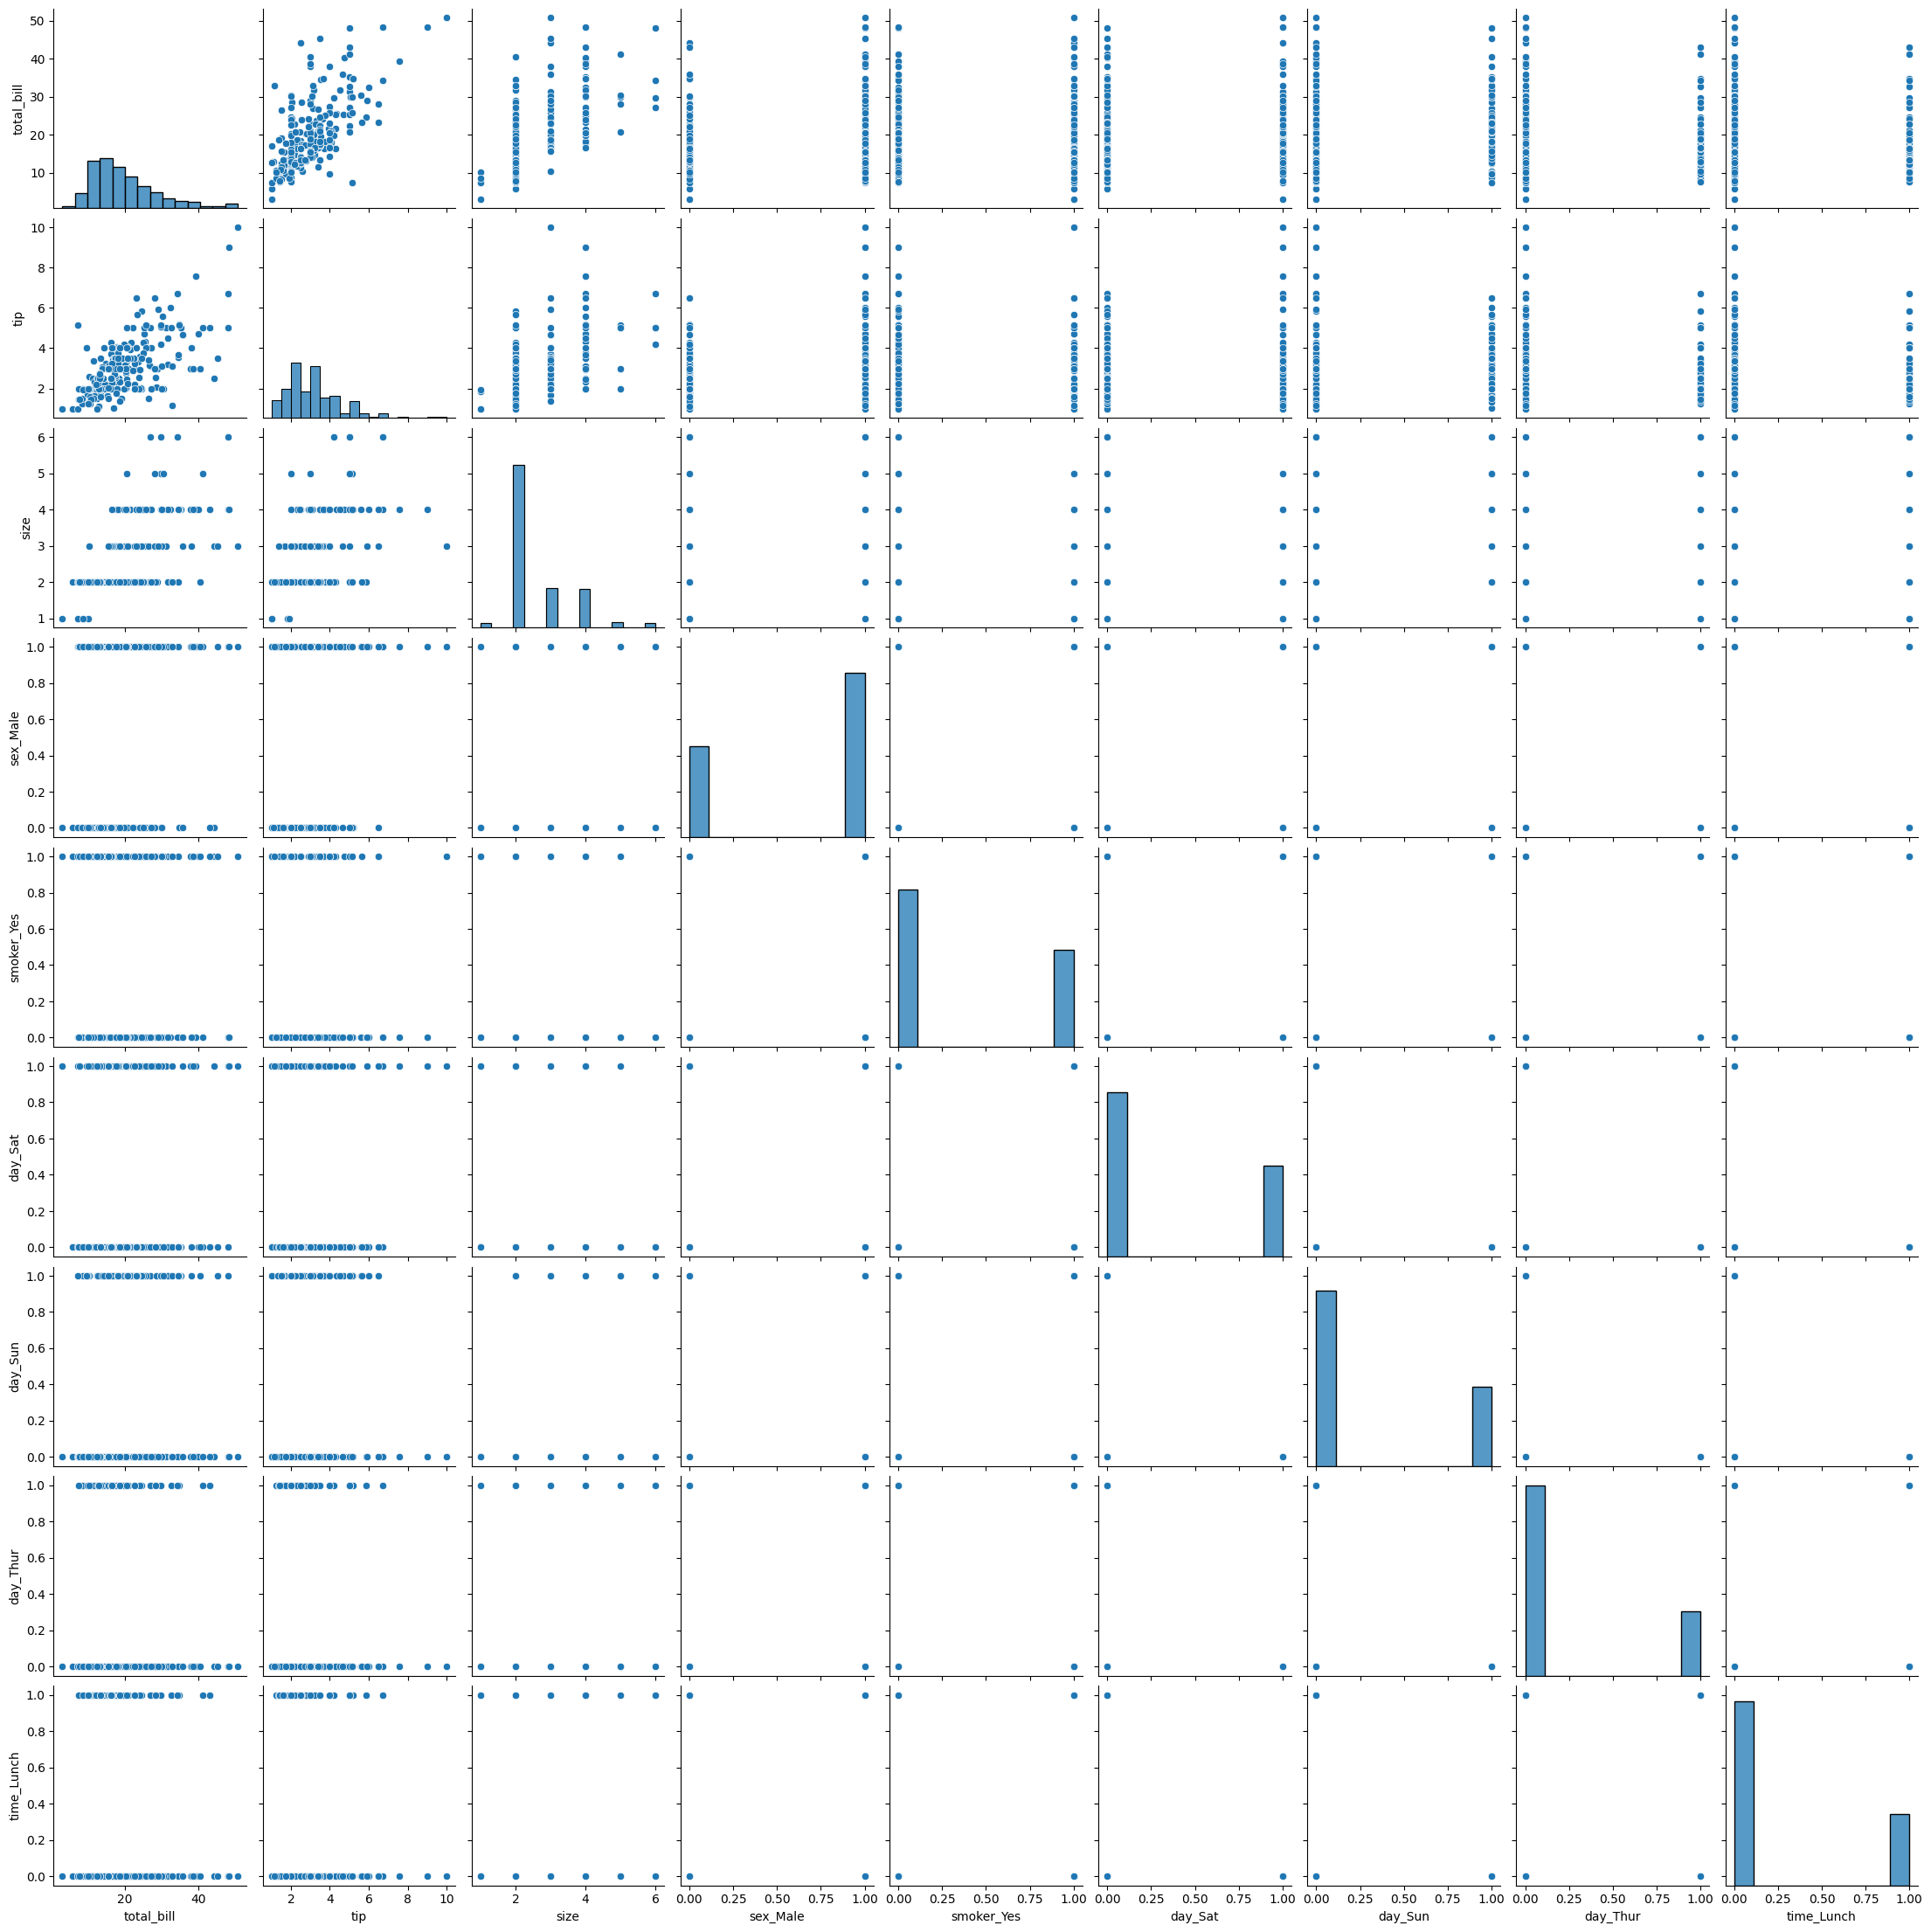

In [15]:
sns.pairplot(df)


<Axes: >

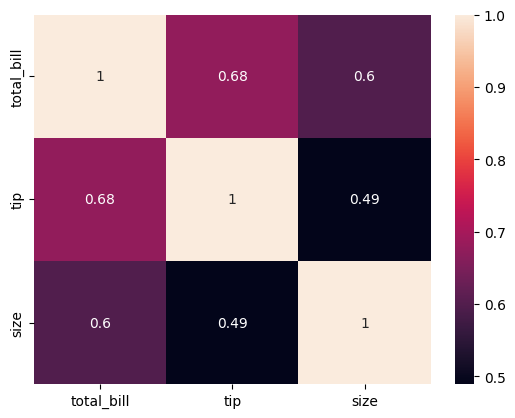

In [24]:
heatmap=df[['total_bill','tip','size']]
correlation=heatmap.corr()
sns.heatmap(correlation,annot=True)

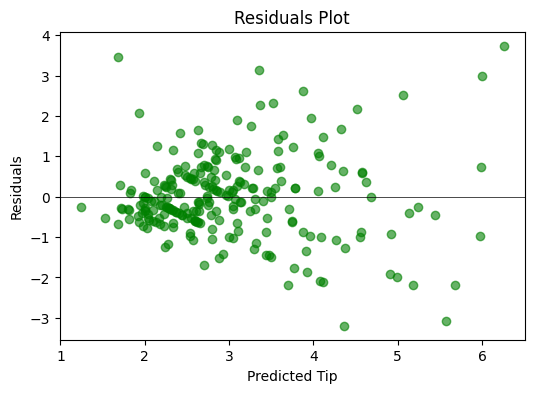

In [43]:
# Residuals plot to check for linearity
X = df[['total_bill']]
y = df['tip']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, color="g", alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

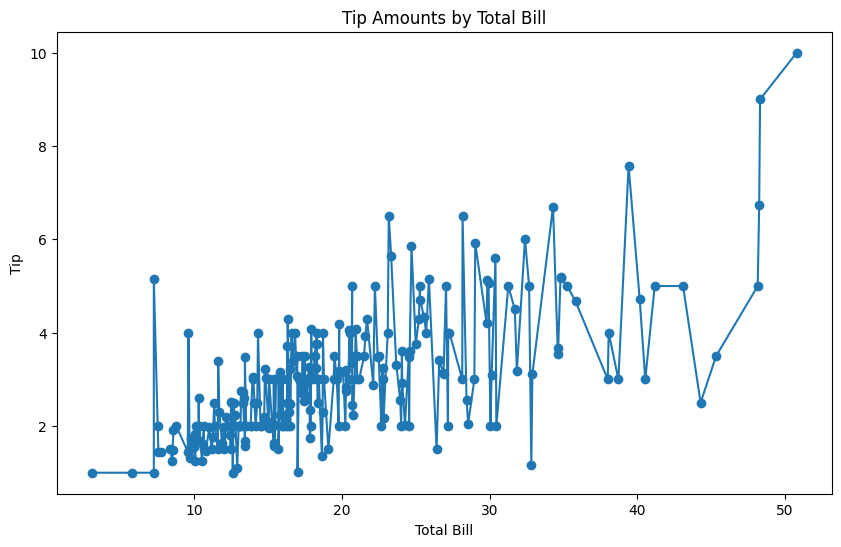

In [44]:
# Sorting data by total bill for line plot (as a stand-in for time series)
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [45]:
# Splitting the data into training and testing sets
X = df.drop("tip", axis=1)
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.43730181943482493, Accuracy Score: 0.40816326530612246
Ridge Regression - R2 Score: 0.4393889716178484, Accuracy Score: 0.40816326530612246
Lasso Regression - R2 Score: 0.5273068720881755, Accuracy Score: 0.40816326530612246
Decision Tree Regression - R2 Score: -0.004178121600921791, Accuracy Score: 0.42857142857142855
Random Forest Regression - R2 Score: 0.2642455218065466, Accuracy Score: 0.3877551020408163
Support Vector Regression - R2 Score: 0.03200492410530387, Accuracy Score: 0.32653061224489793
K-Nearest Neighbors Regression - R2 Score: 0.29888587066985495, Accuracy Score: 0.3877551020408163
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.437302        0.408163
1                Ridge Regression  0.439389        0.408163
2                Lasso Regression  0.527307        0.408163
3        Decision Tree Regression -0.004178        0.428571
4        Random Forest Regression  0.264246        0.387755
5

In [46]:
# Splitting the data into training and testing sets
X = df[["size", "total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.4811084097989493, Accuracy Score: 0.3673469387755102
Ridge Regression - R2 Score: 0.4818828773627837, Accuracy Score: 0.3673469387755102
Lasso Regression - R2 Score: 0.527306163508685, Accuracy Score: 0.40816326530612246
Decision Tree Regression - R2 Score: 0.1962183089778119, Accuracy Score: 0.3673469387755102
Random Forest Regression - R2 Score: 0.3317225587215824, Accuracy Score: 0.4489795918367347
Support Vector Regression - R2 Score: 0.3654420234056548, Accuracy Score: 0.3673469387755102
K-Nearest Neighbors Regression - R2 Score: 0.40844253722501, Accuracy Score: 0.3469387755102041
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.481108        0.367347
1                Ridge Regression  0.481883        0.367347
2                Lasso Regression  0.527306        0.408163
3        Decision Tree Regression  0.196218        0.367347
4        Random Forest Regression  0.331723        0.448980
5       Suppor

In [47]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Getting feature names and their corresponding coefficients
feature_importance = pd.Series(lasso.coef_, index=X_train.columns)

feature_importance = feature_importance[feature_importance != 0] #excluding features with zero coefficients
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
print("Feature Importance in Lasso Regression:")
print(feature_importance)

Feature Importance in Lasso Regression:
size          0.108086
total_bill    0.099098
dtype: float64


In [48]:
# Splitting the data into training and testing sets
X = df[["total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.5449381659234664, Accuracy Score: 0.42857142857142855
Ridge Regression - R2 Score: 0.5449458342338539, Accuracy Score: 0.42857142857142855
Lasso Regression - R2 Score: 0.5462147597181777, Accuracy Score: 0.4489795918367347
Decision Tree Regression - R2 Score: -0.06898287247700985, Accuracy Score: 0.30612244897959184
Random Forest Regression - R2 Score: 0.19370766751511703, Accuracy Score: 0.40816326530612246
Support Vector Regression - R2 Score: 0.11351459432202582, Accuracy Score: 0.3877551020408163
K-Nearest Neighbors Regression - R2 Score: 0.4545453410143979, Accuracy Score: 0.3673469387755102
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.544938        0.428571
1                Ridge Regression  0.544946        0.428571
2                Lasso Regression  0.546215        0.448980
3        Decision Tree Regression -0.068983        0.306122
4        Random Forest Regression  0.193708        0.408163
5   